# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [4]:
from unityagents import UnityEnvironment


import numpy as np
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline




# please do not modify the line below
env = UnityEnvironment(file_name="./Banana_Windows_x86_64/banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [7]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
print("state", state)
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

state [0.         1.         0.         0.         0.16895212 0.
 1.         0.         0.         0.20073597 1.         0.
 0.         0.         0.12865657 0.         1.         0.
 0.         0.14938059 1.         0.         0.         0.
 0.58185619 0.         1.         0.         0.         0.16089135
 0.         1.         0.         0.         0.31775284 0.
 0.        ]
Score: 0.0


When finished, you can close the environment.

In [8]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.

- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 




In [9]:
from dqn_agent import Agent

state_size=37
action_size=4
seed=0

# is_ddqn decides, if the algorithm use DQN  or DDQN
is_double_Q_network = True
is_experience_replay = True


agent = Agent(state_size, action_size, seed, is_double_Q_network, is_experience_replay)


In [12]:
from collections import deque

def dqn(n_episodes, max_t, eps_start, eps_end, eps_decay, Saved_Network_File):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    # print('Parameters: n_episodes: {}, max_t: {}, eps_start: {}, eps_end: {}, eps_decay: {}'.format(n_episodes, \
    #                                                                   max_t, eps_start, eps_end, eps_decay))
    
    print_stop = False
    for i_episode in range(1, n_episodes+1):
        
        # state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        
        score = 0
        for t in range(max_t):
            
            # Class: Agent  
            # Statement: action = agent.act(state, eps) 
            # state: environment data
            # eps: Control-Parameter to set up Epsilon-Greedy Algortihm
                                                        
            # act: Outputparameter --> action
            # The Agent-Method "act" uses the local Network to pick up the  
            # action for the given state according to the: 
            # - Epsilon-Greedy-Policy during the training 
            # - Policy of the trained Network (if eps = 0)
            action = agent.act(state, eps) 
            action = int(action)
            
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            # Class: Agent  
            # Statement: agent.step(state, action, reward, next_state, done)
            # The Methode "step" manage mainly:
            # - the Replay-Buffer
            # - the Network-Training
            # - the Batch proceeding
            agent.step(state, action, reward, next_state, done)
        
        
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13 and print_stop == False:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), Saved_Network_File)
            print_stop = True
            # break
    return scores



### 5. Training for several Parameter-Sets

Episode 100	Average Score: 0.44
Episode 200	Average Score: 2.78
Episode 300	Average Score: 6.03
Episode 400	Average Score: 6.49
Episode 500	Average Score: 7.30
Episode 600	Average Score: 7.26
Episode 700	Average Score: 8.03
Episode 800	Average Score: 9.43
Episode 900	Average Score: 9.50
Episode 1000	Average Score: 9.09


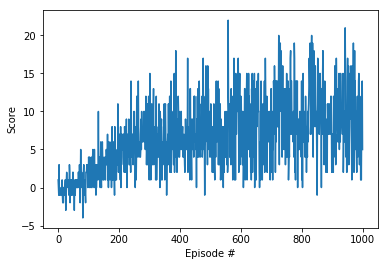

In [13]:
# Training: Parameterset Nr. 1

# Used Algorithm: Deep Q-Network (DQN) without Replay Buffer
Saved_Network_File = "ParametersetNr_1.pth"
n_episodes=1000
max_t=1000
eps_start=1.0
eps_end=0.01
eps_decay=0.995

# Agent interface-Parameter
state_size=37
action_size=4
seed=0
is_double_Q_network = False
is_experience_replay = False

agent = Agent(state_size, action_size, seed, is_double_Q_network, is_experience_replay)
scores = dqn(n_episodes, max_t, eps_start, eps_end, eps_decay, Saved_Network_File)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 0.49
Episode 200	Average Score: 4.73
Episode 300	Average Score: 7.84
Episode 400	Average Score: 10.81
Episode 500	Average Score: 12.29
Episode 580	Average Score: 13.08
Environment solved in 580 episodes!	Average Score: 13.08
Episode 600	Average Score: 13.75
Episode 700	Average Score: 15.12
Episode 800	Average Score: 15.58
Episode 900	Average Score: 15.88
Episode 1000	Average Score: 15.72


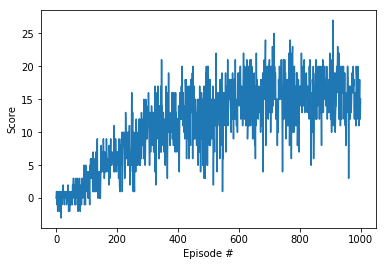

In [10]:

# Training: Parameterset Nr. 2

# Used Algorithm: Deep Q-Network (DQN) with Replay Buffer
Saved_Network_File = "ParametersetNr_2.pth"
n_episodes=1000
max_t=1000
eps_start=1.0
eps_end=0.01
eps_decay=0.995

# Agent interface-Parameter
state_size=37
action_size=4
seed=0
is_double_Q_network = False
is_experience_replay = True

agent = Agent(state_size, action_size, seed, is_double_Q_network, is_experience_replay)
scores = dqn(n_episodes, max_t, eps_start, eps_end, eps_decay, Saved_Network_File)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


Episode 100	Average Score: 0.85
Episode 200	Average Score: 4.06
Episode 300	Average Score: 7.66
Episode 400	Average Score: 11.06
Episode 497	Average Score: 13.03
Environment solved in 497 episodes!	Average Score: 13.03
Episode 500	Average Score: 13.15
Episode 600	Average Score: 14.20
Episode 700	Average Score: 16.08
Episode 800	Average Score: 15.13
Episode 900	Average Score: 14.73
Episode 1000	Average Score: 15.30


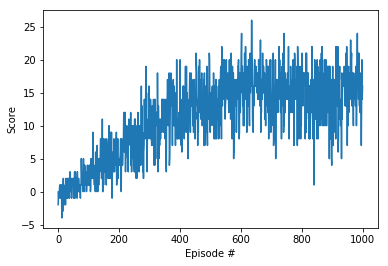

In [11]:

# Training: Parameterset Nr. 3

# Used Algorithm: Deep Double Q-Network (DDQN) with Replay Buffer 
Saved_Network_File = "ParametersetNr_3.pth"
n_episodes=1000
max_t=1000
eps_start=1.0
eps_end=0.01
eps_decay=0.995

# Agent interface-Parameter
state_size=37
action_size=4
seed=0
is_double_Q_network = True
is_experience_replay = True

agent = Agent(state_size, action_size, seed, is_double_Q_network, is_experience_replay)
scores = dqn(n_episodes, max_t, eps_start, eps_end, eps_decay, Saved_Network_File)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


Episode 100	Average Score: 2.36
Episode 200	Average Score: 8.19
Episode 300	Average Score: 11.82
Episode 356	Average Score: 13.00
Environment solved in 356 episodes!	Average Score: 13.00
Episode 400	Average Score: 13.94
Episode 500	Average Score: 15.52
Episode 600	Average Score: 15.79
Episode 700	Average Score: 15.63
Episode 800	Average Score: 15.37
Episode 900	Average Score: 15.72
Episode 1000	Average Score: 14.91


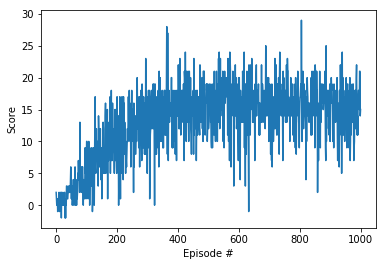

In [9]:

# Training: Parameterset Nr. 4
# Used Algorithm: Double-Deep Q-Network (DDQN)  with Replay Buffer, tweaking eps-Parameters

Saved_Network_File = "ParametersetNr_4.pth"
n_episodes=1000
max_t=1000
eps_start=0.95
eps_end=0.01
eps_decay=0.985

# Agent interface-Parameter
state_size=37
action_size=4
seed=0
is_double_Q_network = True
is_experience_replay = True



agent = Agent(state_size, action_size, seed, is_double_Q_network, is_experience_replay)
scores = dqn(n_episodes, max_t, eps_start, eps_end, eps_decay, Saved_Network_File)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


Episode 100	Average Score: 2.00
Episode 200	Average Score: 8.82
Episode 300	Average Score: 12.21
Episode 357	Average Score: 13.08
Environment solved in 357 episodes!	Average Score: 13.08
Episode 400	Average Score: 13.76
Episode 500	Average Score: 15.15
Episode 600	Average Score: 16.02
Episode 700	Average Score: 16.17
Episode 800	Average Score: 15.71
Episode 900	Average Score: 15.84
Episode 1000	Average Score: 15.74


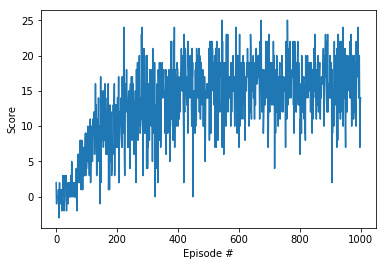

In [10]:
#Training: Parameterset Nr. 5

# Used Algorithm: Double-Deep Q-Network (DDQN) with Replay Buffer
Saved_Network_File = "ParametersetNr_5.pth"
n_episodes=1000
max_t=1000
eps_start=0.975
eps_end=0.01
eps_decay=0.975

# Agent interface-Parameter
state_size=37
action_size=4
seed=0
is_double_Q_network = True
is_experience_replay = True

# is_ddqn decides, if the algorithm use DQN  or DDQN

agent = Agent(state_size, action_size, seed, is_double_Q_network, is_experience_replay)
scores = dqn(n_episodes, max_t, eps_start, eps_end, eps_decay, Saved_Network_File)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [ ]:
env.close()

### 6. Show a trained Model moving in Unitiy-Environment
(only for running on local windows-machine)

In [ ]:
'''
brain = env.brains[brain_name]
print("brain_name", brain_name)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device", device)

#load a trained model
agent.qnetwork_local.load_state_dict(torch.load('.\ParametersetNr_1.pth', map_location={'cuda:0': 'cpu'}))
#agent.qnetwork_local.load_state_dict(torch.load('ParametersetNr_1.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment for Use-Mode (train_mode = False)

state = env_info.vector_observations[0]            # get state-Starting-Point
print("state", state)

While True:
    action = agent.act(state)                      # The agend uses the trained model to get the best action
                                                   # As "act" gets only one parameter. Epsilon will be  0, 
                                                   # so no Random-Action is possible. (see act-Parameters)
    action = int (action)                          # Just tu avoid an compatibility-error-message
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    done = env_info.local_done[0]                  # see if episode has finished
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
        
'''